<a href="https://colab.research.google.com/github/IgorMatias04/AulaIA07/blob/main/AulaIa_07_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'

--2023-04-26 22:22:49--  http://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15021 (15K) [application/x-httpd-php]
Saving to: ‘Wholesale customers data.csv’

Wholesale customers 100%[===================>]  14.67K  --.-KB/s    in 0.03s   

2023-04-26 22:22:49 (561 KB/s) - ‘Wholesale customers data.csv’ saved [15021/15021]



In [2]:
!pip install kneed
from kneed import KneeLocator 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
data = pd.read_csv('Wholesale customers data.csv')
print("Descrição da base:\n", data.head())

Descrição da base:
    Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [4]:
atributos_categoricos = ['Channel', 'Region']
atributos_continuos = ['Fresh', 'Milk', 'Grocery', 'Frozen',
'Detergents_Paper', 'Delicassen']

In [5]:
print("\nEstatísticas das variáveis contínuas:\n",
data[atributos_continuos].describe())


Estatísticas das variáveis contínuas:
                Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


In [6]:
for col in atributos_categoricos:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)

In [7]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [8]:
mms = MinMaxScaler()
mms.fit(data)
dados_transformados = mms.transform(data)
print("\nDados depois da mudança de escala:\n", dados_transformados)


Dados depois da mudança de escala:
 [[0.11294004 0.13072723 0.08146416 ... 0.         0.         1.        ]
 [0.06289903 0.13282409 0.10309667 ... 0.         0.         1.        ]
 [0.05662161 0.11918086 0.08278992 ... 0.         0.         1.        ]
 ...
 [0.1295431  0.21013575 0.32594285 ... 0.         0.         1.        ]
 [0.091727   0.02622442 0.02402535 ... 0.         0.         1.        ]
 [0.02482434 0.02237109 0.02702178 ... 0.         0.         1.        ]]


In [9]:
Soma_distancias_quadraticas = []
K = range(1,15)
print('\nK\tSoma das distâncias quadráticas')
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dados_transformados)
    Soma_distancias_quadraticas.append(km.inertia_)
    print(k,'\t',Soma_distancias_quadraticas[k-1])


K	Soma das distâncias quadráticas


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1 	 411.82878995921095
2 	 213.39898477020841


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 	 117.07252399254901
4 	 71.3898924024373
5 	 37.92243771816281
6 	 19.418928179725285
7 	 15.679164181072158
8 	 13.129100808295886
9 	 11.729722696142495


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

10 	 10.656257033418132
11 	 9.711927016617429
12 	 9.013402546752445
13 	 8.06243058222434


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


14 	 7.792764404098787


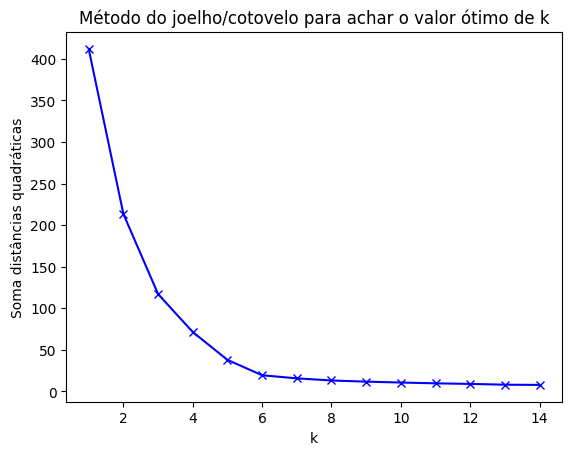

In [10]:
plt.plot(K, Soma_distancias_quadraticas, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma distâncias quadráticas')
plt.title('Método do joelho/cotovelo para achar o valor ótimo de k')
plt.show()

In [12]:
print('Visualmente, o joelho/cotovelo da curva, que corresponde ao k melhor para este problema está entre k=4 e 6 (observe acima).')
kl = KneeLocator(K, Soma_distancias_quadraticas, curve="convex",
direction="decreasing")
print('O método analítico informa que o joelho/cotovelo está em k =', kl.elbow)

Visualmente, o joelho/cotovelo da curva, que corresponde ao k melhor para este problema está entre k=4 e 6 (observe acima).
O método analítico informa que o joelho/cotovelo está em k = 5
